Created by: Muammar Khadafi

Dicoding username: muamkh

In [1]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15823411738802616964, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14674281152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13252681271566452115
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-16 05:53:15--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.41MB/s    in 4m 44s  

2021-05-16 05:58:00 (1.08 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [5]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [10]:
import shutil

shutil.rmtree('/tmp/rockpaperscissors/rps-cv-images', ignore_errors=True)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
class callBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') <= 0.05):
            print()
            print("Training di stop karena loss sudah kurang dari 0.05")
            self.model.stop_training = True
callbacks = callBack()

In [11]:
_datagen = ImageDataGenerator(
    rescale=1./255,      
    horizontal_flip=True,
    width_shift_range=.2,
    height_shift_range=.2,
    vertical_flip = True,
    rotation_range=40,
    shear_range = 0.2,
    fill_mode = 'nearest',
    brightness_range=[0.5,1.5],
    validation_split = 0.4
)  

train_generator = _datagen.flow_from_directory(
    data_path,
    target_size=(200, 300),
    batch_size=128,
    class_mode='categorical',
    subset='training'
)

validation_generator = _datagen.flow_from_directory(
    data_path,
    target_size=(200, 300),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (7,7), activation='relu', input_shape=(200, 300, 3)),\
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (7,7), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),

    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss='kullback_leibler_divergence',
              optimizer='Nadam',
              metrics=['accuracy']
              )

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 194, 294, 16)      2368      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 97, 147, 16)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 91, 141, 32)       25120     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 45, 70, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 41, 66, 32)        25632     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 20, 33, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 29, 64)       

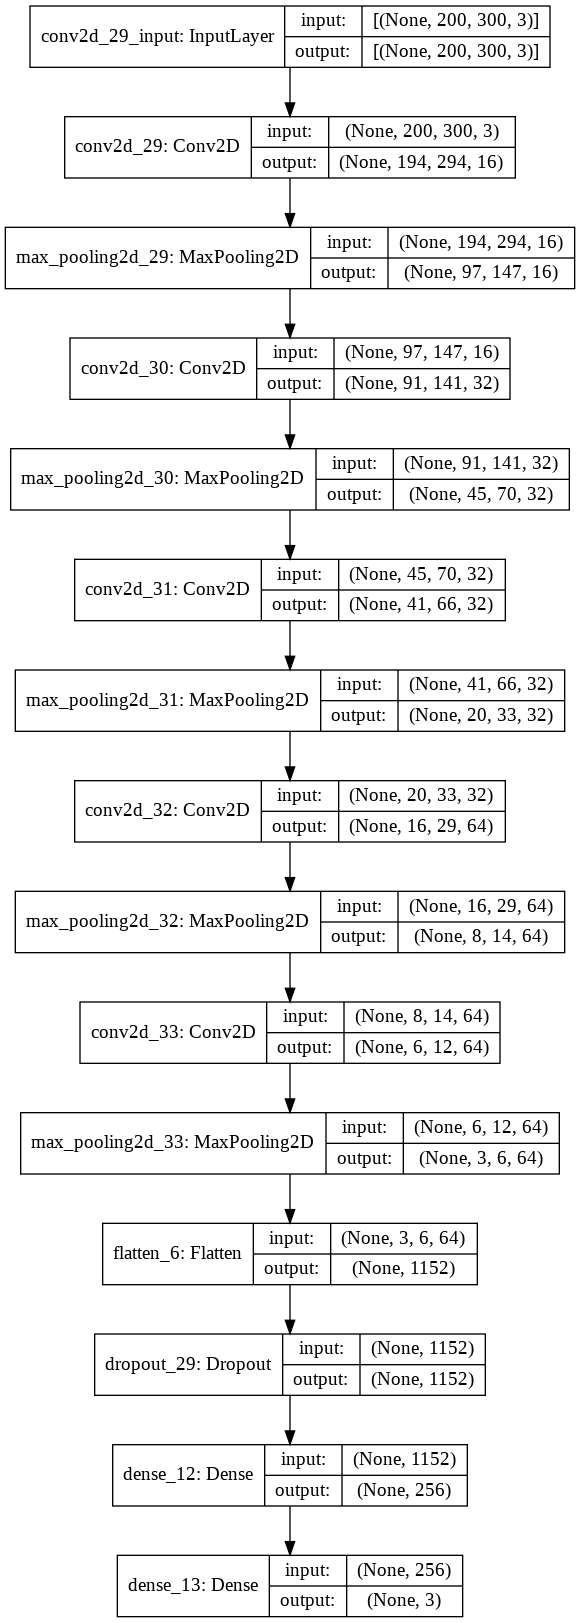

In [30]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [28]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples / train_generator.batch_size - 1,
    epochs=45,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples / validation_generator.batch_size - 1,
    callbacks=[callbacks],
)

print(history.epoch, history.history['accuracy'][-1])

Epoch 1/45
9/9 [==============================] - 34s 4s/step - loss: 1.0962 - accuracy: 0.3540 - val_loss: 1.2688 - val_accuracy: 0.3264
Epoch 2/45
9/9 [==============================] - 32s 4s/step - loss: 1.1218 - accuracy: 0.4339 - val_loss: 1.0454 - val_accuracy: 0.5556
Epoch 3/45
9/9 [==============================] - 32s 4s/step - loss: 1.0297 - accuracy: 0.5168 - val_loss: 0.9444 - val_accuracy: 0.6609
Epoch 4/45
9/9 [==============================] - 33s 4s/step - loss: 0.9438 - accuracy: 0.6141 - val_loss: 1.0656 - val_accuracy: 0.6169
Epoch 5/45
9/9 [==============================] - 32s 4s/step - loss: 1.0382 - accuracy: 0.5433 - val_loss: 0.6674 - val_accuracy: 0.7639
Epoch 6/45
9/9 [==============================] - 33s 4s/step - loss: 1.3410 - accuracy: 0.5128 - val_loss: 1.0865 - val_accuracy: 0.3611
Epoch 7/45
9/9 [==============================] - 33s 4s/step - loss: 1.0702 - accuracy: 0.4444 - val_loss: 0.9136 - val_accuracy: 0.5961
Epoch 8/45
9/9 [==================

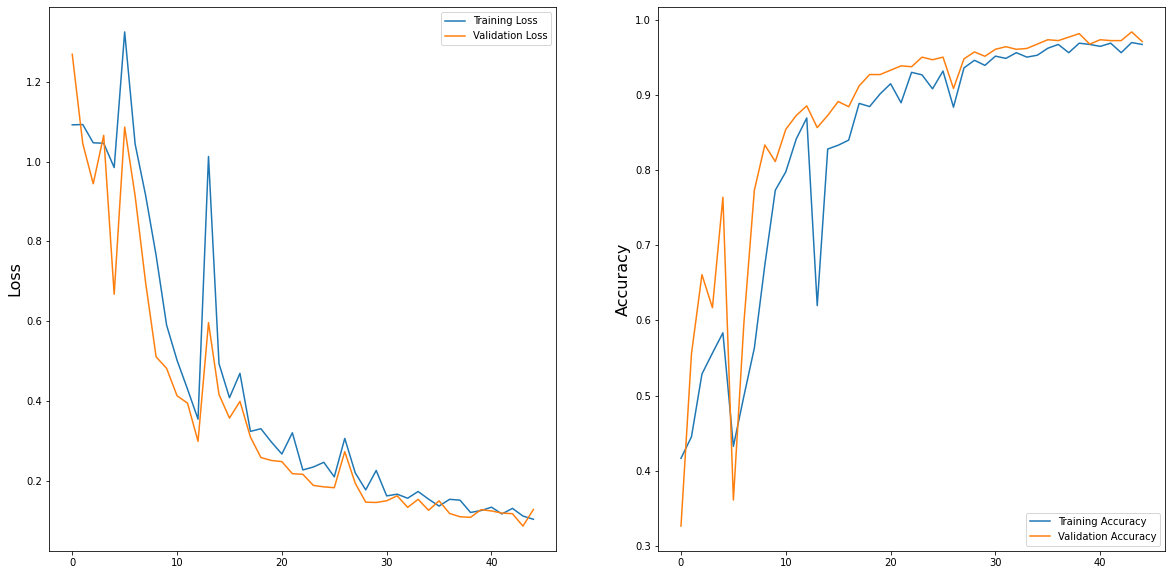

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [35]:
import sklearn.metrics 
from sklearn.metrics import classification_report, confusion_matrix

test_generator = _datagen.flow_from_directory(
    directory=data_path,
    target_size=(200, 300),
    batch_size=128,
    class_mode="categorical",
    shuffle=False
)
val_steps=test_generator.n//test_generator.batch_size+1

Y_pred = model.predict(test_generator, test_generator.n // 
128+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

Found 2188 images belonging to 3 classes.
Confusion Matrix
[[682  16  14]
 [ 18 705   3]
 [  4   1 745]]


In [31]:
model.save('/content/drive/My Drive/Colab Notebooks/modelrockpaperscissors.h5')

Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq (1).png
00nKV8oHuTGi20gq.png
rock


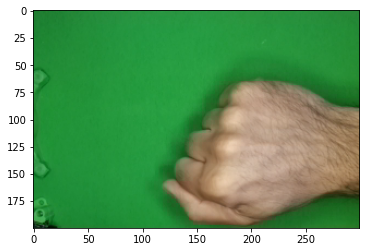

In [60]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline


uploaded = files.upload()
 
for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if np.argmax(classes, axis=1)==0:
    print('paper')
  elif np.argmax(classes, axis=1)==1:
    print('rock')
  else:
    print('scissors')